# Plot wordcloud of the paper

In [19]:
# import sys
# !{sys.executable} -m pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import re
import string
import operator 
from collections import Counter
from nltk.corpus import stopwords
import PyPDF2  
from PIL import Image
from wordcloud import WordCloud

In [11]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [12]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(10, 100%%, %d%%)" % np.random.randint(40, 100)

In [13]:
ls = []
path = r"U:\Papers\SERT KO paper\submission\Transfer to Cerebral Cortex Communications\SERT_paper_combined_text_revision_v2.pdf"

# creating a pdf file object  
pdfFileObj = open(path, 'rb')  
    
# creating a pdf reader object  
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)  
    
# printing number of pages in pdf file  
pages = pdfReader.numPages
# don't include references
for p in range(pages - 3):
    pageObj = pdfReader.getPage(p)  
    text = pageObj.extractText()
    ls.append(text)

# closing the pdf file object  
pdfFileObj.close()  


In [60]:
count_terms = Counter()
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + [ 'et', 'al', 'vs', 'figure', 'test', 'used', 
                                                   'using', 'oscillatory','kruskal' , 'wallis']
for idx in range(len(ls)):
    text = ls[idx]
    terms_only = [term for term in preprocess(text) 
              if term not in stop and
              not len(term) < 2] 

    # Update the counter
    count_terms.update(terms_only)
    # Print the first 5 most frequent words
print(count_terms.most_common(30))


[('mice', 83), ('ko', 81), ('sert', 75), ('tuning', 56), ('experience', 54), ('het', 53), ('wt', 51), ('visual', 48), ('different', 48), ('sf', 46), ('perceptual', 45), ('post', 44), ('units', 39), ('contrast', 36), ('stimulus', 34), ('frequency', 33), ('orientation', 31), ('spatial', 29), ('groups', 28), ('oscillations', 26), ('response', 25), ('genotype', 24), ('responses', 23), ('duration', 23), ('pre', 23), ('cortical', 22), ('activity', 21), ('deficient', 20), ('learning', 19), ('across', 18)]


In [17]:
path_image = r"U:\Papers\Kanizsa paper\J Neuro revision\cover_art.jpg"
mask = np.array(Image.open(path_image))

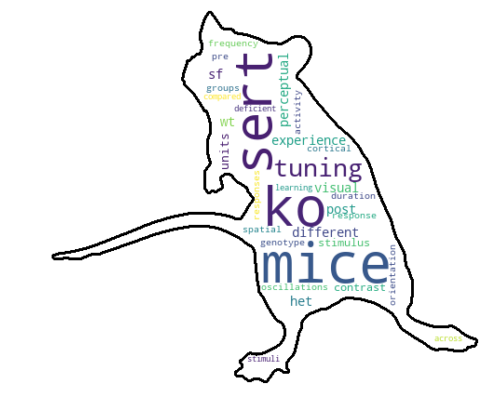

In [85]:
_input = count_terms
wc = WordCloud( mask = dst, contour_width = 2, contour_color= 'black',
                background_color ='white', max_font_size = 80, 
                max_words=200, random_state= 42, 
                min_font_size = 8).generate_from_frequencies(_input) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off") 
# plt.tight_layout(pad = 0) 
plt.savefig('wc_sert_paper.jpg', dpi = 300)


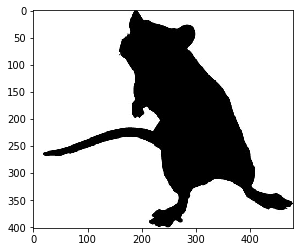

In [21]:
plt.imshow(mask)

In [24]:
import cv2

In [27]:
kernel = np.ones((5,5),np.float32)
dst = cv2.filter2D(mask,-1,kernel)